<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%A0%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%BD%D0%B0%D0%B8%D0%BC%D0%B5%D0%BD%D1%8C%D1%88%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание

- Создать набор данных не менее чем 2 строк х 5 столбцов. 
- Одну из переменных назначить зависимой (целевой). 
- Методом наименьших квадратов найти коэффициенты линейной зависимости между независимой и зависимой переменной. 
- Создать прогноз для изменения зависимой переменной на следующие два значения независимой.

A = [[55, 15], [15, 5]]
B = [[108, 31]]
X = [[1.5000000000000018, 1.7000000000000028]]
           0    1    2    3     4
Frags    3.0  6.0  5.0  7.0  10.0
Level    1.0  2.0  3.0  4.0   5.0
Прогноз  3.2  4.7  6.2  7.7   9.2
[1.5 1.7]


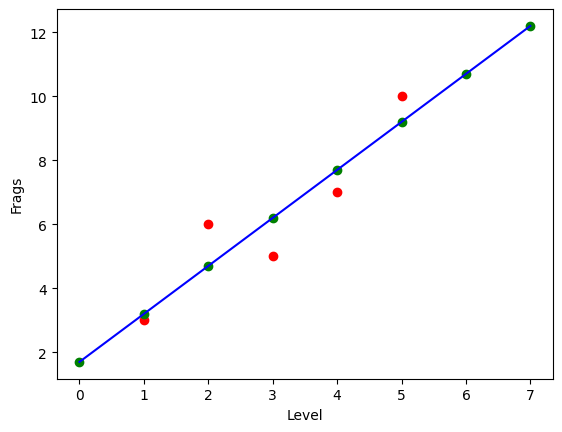

In [38]:
def mat_make(width,height):
    matrix = []
    for i in range(width):
        matrix_temp = []
        for j in range(height):
            matrix_temp.append(0)
        matrix.append(matrix_temp)
    return matrix

def mat_trasposition(a):
    matrix = []
    matrix_temp = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            z = a[j][i]
            matrix_temp.append(z)
        matrix.append(matrix_temp)
        matrix_temp = []
    return matrix

def mat_determinant_at(mat):
  det = 0
  m = len(mat)
  if m == 2:
    det = mat[0][0] * mat[1][1] - mat[0][1] * mat[1][0]
  if m > 2:
    for k in range(m):
      det += mat[0][k] * (-1) ** k *\
          mat_determinant_at([mat[i][:k] + mat[i][k+1:] for i in range(1,m)])
  return det

def mat_mul_num(a,b):
    matrix = []
    matrix_temp = []
    for i in range(len(a)):
        for j in range(len(a[0])):
            z = a[i][j] * b
            matrix_temp.append(z)
        matrix.append(matrix_temp)
        matrix_temp = []
    return matrix

def mat_inverse(mat):
  det_mat = mat_determinant_at(mat)
  if det_mat == 0:
    return 0
  else:
    m = len(mat)
    join_mat = [[mat[1][1], (-1) * mat[1][0]], [(-1) * mat[0][1], mat[0][0]]]
    inv_mat = mat_mul_num(mat_trasposition(join_mat),round((1 / det_mat),2))
  return inv_mat

def mat_mul_mat(a,b):
    matrix = []
    for x in a:
        matrix_temp = []
        for y in zip(*b):
            z = 0
            for i,j in zip(x, y):
                z += i*j
            matrix_temp.append(z)
        matrix.append(matrix_temp)
    return matrix

def ab(x,y):
    z = mat_make(1,2)
    w = mat_make(2,2)
    h = mat_make(1,2)
    
    for i in x:
        w[0][1] += i
    for i in y:
        z[0][1] += i
    for i in x:
        w[0][0] += i**2
    for i in range(len(x)):
        z[0][0] += x[i] * y[i]
    w[1][1] = len(x)
    w[1][0] = w[0][1]
    h = mat_mul_mat(z,mat_inverse(w))

    print('A =', w)
    print('B =', z)
    print('X =', h)

    return h[0]

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# данные
level = [1,2,3,4,5]
frags = [3,6,5,7,10]

# получение данных для предсказаний
model = ab(level, frags)

# строю тблицу по данным
df = pd.DataFrame({'Frags':frags})
df['Level'] = df.index+1
df['Прогноз'] = df['Level']*model[0]+model[1]
print(df.T)

# строю график по данным
leng = int(input('Введите уровень: '))

estimate = np.poly1d(model)     # подставлять a и b в формулу a*x+b
estimation = mat_make(1,2)[0]
estimation[0] = range(leng)
estimation[1] = [estimate(estimation[0])]


# это не моё
prognoz = np.poly1d(np.polyfit(level, frags, 1))
x_axis = range(leng)
y_axis = prognoz(x_axis)

plt.xlabel('Level')
plt.ylabel('Frags')    
plt.scatter(level, frags, c = 'r')                      # красное — изначальные данные
plt.scatter(estimation[0], estimation[1], c = 'g')      # зелёное — предсказано по моему алгоритму
plt.plot(x_axis, y_axis, c = 'b')                       # синее   — предсказано через numpy.polyfit()